In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('./TSLA.csv.xls')
df.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2015-10-16,223.04,230.48,222.87,227.01,4334500,16.644498,273.497495,206.919505,221.31,...,101.787,100.1025,100.8126,2033.11,2023.86,2014.89,17215.97,17141.75,17084.49,228.10
1,2015-10-19,226.50,231.15,224.94,228.10,2507900,15.843992,270.091485,206.715515,227.01,...,102.097,100.2490,100.7876,2033.66,2033.11,2017.46,17230.54,17215.97,17131.86,213.03
2,2015-10-20,227.72,228.60,202.00,213.03,14900000,15.879086,267.766172,204.249828,228.10,...,102.402,100.4445,100.7280,2030.77,2033.66,2003.69,17217.11,17230.54,17081.89,210.09
3,2015-10-21,211.99,214.81,208.80,210.09,4151500,15.736323,264.932145,201.986855,213.03,...,102.583,100.6040,100.6828,2018.94,2030.77,1994.24,17168.61,17217.11,16924.75,211.72
4,2015-10-22,211.56,215.75,209.40,211.72,2825200,14.807124,260.503749,201.275251,210.09,...,102.933,100.8870,100.6724,2052.51,2018.94,2023.86,17489.16,17168.61,17141.75,209.09


In [4]:
df.shape

(1215, 64)

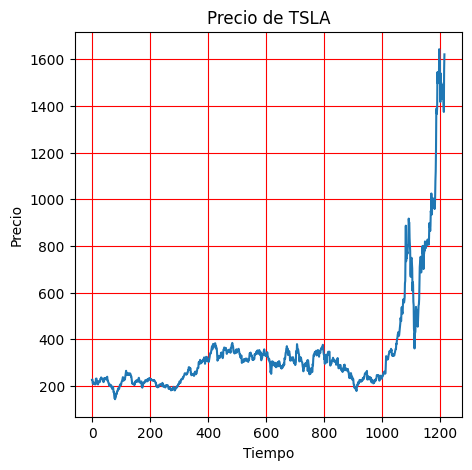

In [6]:
df['Close(t)'].plot(figsize=(5,5))
plt.title('Precio de TSLA')
plt.ylabel('Precio')
plt.xlabel('Tiempo')
plt.grid(color='r')
plt.show()

In [7]:
df = df.drop(columns=['Date', 'Date_col'])

In [8]:
N = df.shape[0]
N

1215

In [9]:
Y = df['Close(t)']
X = df.drop(columns=['Close(t)'])

In [10]:
# usaremos el 70% de los registros como conjunto de entrenamiento
X_train = X.iloc[0:int(N*0.7)]
Y_train = Y.iloc[0:int(N*0.7)]

X_test = X.iloc[int(N*0.7):]
Y_test = Y.iloc[int(N*0.7):]

In [11]:
X_train.shape

(850, 61)

In [12]:
X_test.shape

(365, 61)

In [13]:
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [15]:
#modelo.coef_

In [16]:
Y_pred = modelo.predict(X_test)

In [17]:
metrics.r2_score(Y_test, Y_pred) ## El modelo es muy bueno R2 es muy cercano a 1

0.9999844214468783

<Axes: >

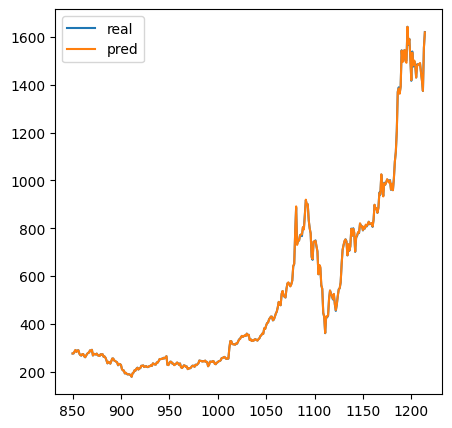

In [19]:
pd.DataFrame({'real': Y_test, 'pred': Y_pred}).plot(figsize=(5,5))